In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [2]:
# Load the 'train' dataset
train = pd.read_csv("train.csv")

In [3]:
# Shape of the train dataset
train.shape

(4781, 17)

In [5]:
# Print first 5 rows of train dataset
train.head()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [7]:
# Drop 'Id' column from train dataset
train.drop("Id", axis=1,  inplace=True)

In [8]:
# Check if the column is dropped
train.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [10]:
# Check random 5 rows of train dataset
train.sample(n=5)

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
2675,4,0,510000,3,257,14.7,3030,2,1,531,147.0,2003,30,144.64268,6,16166
153,3,0,1425000,0,106,5.9,3032,2,2,495,139.0,1920,21,144.90550,6,6567
1242,4,0,2525000,1,32,10.3,3187,2,2,725,300.0,2000,1,145.01518,5,6938
1588,4,0,1205000,1,16,15.5,3106,2,2,646,167.0,1980,15,145.13478,0,6202
1319,3,0,617000,3,260,12.4,3060,1,1,540,114.0,1960,23,144.96200,2,5070


In [11]:
# Get info on train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 16 columns):
Rooms            4781 non-null int64
Type             4781 non-null int64
Price            4781 non-null int64
Method           4781 non-null int64
SellerG          4781 non-null int64
Distance         4781 non-null float64
Postcode         4781 non-null int64
Bathroom         4781 non-null int64
Car              4781 non-null int64
Landsize         4781 non-null int64
BuildingArea     4781 non-null float64
YearBuilt        4781 non-null int64
CouncilArea      4781 non-null int64
Longtitude       4781 non-null float64
Regionname       4781 non-null int64
Propertycount    4781 non-null int64
dtypes: float64(3), int64(13)
memory usage: 597.7 KB


<font color='blue'> No NULL values in the dataset
</font>

In [13]:
# Descriptive Stats on all columns of tran dataset
train.describe()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.000000,4781.000000,4.781000e+03,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,2.964861,0.540473,1.080936e+06,1.441330,131.485254,10.045367,3103.308931,1.587952,1.605522,480.500105,143.157231,1964.338423,13.609705,144.991934,3.772223,7477.201213
std,0.957911,0.837337,6.757098e+05,1.141898,77.203630,5.871496,87.538064,0.711276,0.946698,899.489722,91.438501,38.064151,10.389644,0.103051,2.024068,4395.746550
min,1.000000,0.000000,1.450000e+05,0.000000,2.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.545320,0.000000,389.000000
25%,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,168.000000,94.000000,1940.000000,2.000000,144.927270,2.000000,4380.000000
50%,3.000000,0.000000,9.000000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,411.000000,126.000000,1970.000000,15.000000,144.997500,5.000000,6567.000000
75%,4.000000,1.000000,1.337000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,638.000000,172.000000,2000.000000,23.000000,145.055720,5.000000,10331.000000
max,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.300000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.445300,7.000000,21650.000000


In [15]:
# Check 'skewness' in target variable
train['Price'].skew()

2.429553396944038

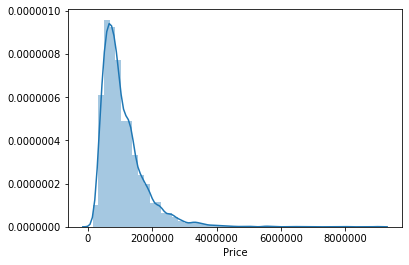

In [16]:
# Plotting histogram of target variable
sns.distplot(train['Price'])

<font color='blue'> Target variable ('Price') is right skewed. </font>

In [19]:
# Check correlation between all the variables
train.corr(method="pearson")

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.590817,0.523579,-0.053525,-0.029506,0.289699,0.050753,0.607276,0.420030,0.092030,0.595395,-0.056373,-0.207234,0.095944,-0.009092,-0.106854
Type,-0.590817,1.000000,-0.426876,0.088308,0.026955,-0.242188,0.018737,-0.276890,-0.278868,-0.043433,-0.386768,0.304479,0.159736,0.000434,0.055988,0.111803
Price,0.523579,-0.426876,1.000000,-0.048165,-0.065393,-0.158197,0.120166,0.493173,0.237160,0.072753,0.519207,-0.297060,-0.119382,0.217738,0.083803,-0.052399
Method,-0.053525,0.088308,-0.048165,1.000000,-0.008889,-0.064479,-0.034679,-0.013801,-0.019285,-0.021601,-0.048287,0.021274,0.018771,-0.059914,0.033184,-0.024244
SellerG,-0.029506,0.026955,-0.065393,-0.008889,1.000000,0.024476,-0.001913,-0.034939,-0.000271,-0.028470,-0.042596,-0.000680,-0.002784,-0.061029,0.023397,0.063498
Distance,0.289699,-0.242188,-0.158197,-0.064479,0.024476,1.000000,0.414110,0.114934,0.257264,0.063563,0.145823,0.252163,-0.280674,0.210853,-0.089077,-0.063805
Postcode,0.050753,0.018737,0.120166,-0.034679,-0.001913,0.414110,1.000000,0.088003,0.024650,0.030973,0.062701,0.027168,-0.059066,0.423931,0.006935,0.058458
Bathroom,0.607276,-0.276890,0.493173,-0.013801,-0.034939,0.114934,0.088003,1.000000,0.325872,0.080768,0.525465,0.162484,-0.102732,0.109001,0.037968,-0.058078
Car,0.420030,-0.278868,0.237160,-0.019285,-0.000271,0.257264,0.024650,0.325872,1.000000,0.112280,0.318675,0.108676,-0.164842,0.048052,0.005941,-0.032157
Landsize,0.092030,-0.043433,0.072753,-0.021601,-0.028470,0.063563,0.030973,0.080768,0.112280,1.000000,0.081878,0.032836,-0.049492,0.039890,-0.012608,-0.019397


<font color='blue'> Number of rooms has a strong correlation with Propoerty Type, Number of Bathrooms, BuildingArea</font>

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [26]:
# Seperating Target and Predictor variables
X = train.drop('Price', axis=1)
y = train['Price']

### Holdout Method for  Cross Valaidation

In [28]:
# Split the train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model 1 - Linear Regression without transforming Target Variable

In [39]:
# Instantiate the model
model1 = LinearRegression()

# Fit the model
model1.fit(X_train, y_train)

# Predict on validation dataset
model1_pred = model1.predict(X_val)

# Calculate R2 score for model1
r2_score(y_val, model1_pred)

0.5975180064230825

#### Model 2 - Linear Regression after transforming Target Variable

In [40]:
# Instantiate the model
model2 = LinearRegression()

# Fit the model
model2.fit(X_train, np.log(y_train))

# Predict on validation dataset
model2_pred = model2.predict(X_val)

# Calculate R2 score for model1
r2_score(np.log(y_val), model2_pred)

0.7239863307912293

#### Model 3 - Linear Regression after transforming Target Variable and using Polynomial Features

In [44]:
# Instantiate the model
model3 = make_pipeline(PolynomialFeatures(2),LinearRegression())

# Fit the model
model3.fit(X_train, np.log(y_train))

# Predict on validation dataset
model3_pred = model3.predict(X_val)

# Calculate R2 score for model1
r2_score(np.log(y_val), model3_pred)

-0.3278408172507812

#### Model 4 - Lasso Regression without transforming Target Variable

In [47]:
# Instantiate the model
model4 = Lasso()

# Fit the model
model4.fit(X_train, y_train)

# Predict on validation dataset
model4_pred = model4.predict(X_val)

# Calculate R2 score for model1
r2_score(y_val, model4_pred)

0.5975169167214176

#### Model 5 - Lasso Regression after transforming Target Variable & using Polynomial Regressor

In [50]:
# Instantiate the model
model5 = make_pipeline(PolynomialFeatures(2),Lasso())

# Fit the model
model5.fit(X_train, np.log(y_train))

# Predict on validation dataset
model5_pred = model5.predict(X_val)

# Calculate R2 score for model1
r2_score(np.log(y_val), model5_pred)

-0.9780828745374148

#### Model 6 - Ridge Regression after transforming Target Variable

In [52]:
# Instantiate the model
model6 = Ridge()

# Fit the model
model6.fit(X_train, np.log(y_train))

# Predict on validation dataset
model6_pred = model6.predict(X_val)

# Calculate R2 score for model1
r2_score(np.log(y_val), model6_pred)

0.7237196556043966

#### Model 7 - Ridge Regression after transforming Target Variable & using Polynomial Regressor

In [55]:
# Instantiate the model
model7 = make_pipeline(PolynomialFeatures(2),Ridge())

# Fit the model
model7.fit(X_train, np.log(y_train))

# Predict on validation dataset
model7_pred = model7.predict(X_val)

# Calculate R2 score for model1
r2_score(np.log(y_val), model7_pred)

-0.3912973380703577

### Cross Validation (10-Fold) on 3 best models

In [57]:
# import packages
from sklearn.metrics import make_scorer

In [58]:
# Define scorer for CV
scorer = make_scorer(r2_score, greater_is_better = False)

In [59]:
# On model 2
-np.mean(cross_val_score(estimator=model2, X=X_train, y=y_train, scoring=scorer, cv=10))

0.6223660304061914

In [60]:
# On model 5
-np.mean(cross_val_score(estimator=model5, X=X_train, y=y_train, scoring=scorer, cv=10))

0.7230774673794766

In [62]:
# On model 6
-np.mean(cross_val_score(estimator=model6, X=X_train, y=y_train, scoring=scorer, cv=10))

0.6225553355907617

### <font color='blue'> Going ahead with model 5 </font>

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [12]:
# Load the 'test' dataset
test = pd.read_csv("test.csv")

In [4]:
# Shape of the test dataset
test.shape

(2049, 16)

In [9]:
# Print the first 5 rows of test dataset
test.head()

,Id,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,5067,4,0,1,32,27.0,3196,2,2,536,202.0,1985,12,145.13286,4,2076
1,3722,4,0,1,28,12.4,3060,2,2,567,116.0,1950,23,144.97030,2,5070
2,6820,5,0,1,16,12.4,3107,3,2,717,310.0,1963,-1,145.11320,0,5420
3,3103,2,2,1,196,3.3,3141,1,1,0,61.0,1965,26,144.98860,5,14887
4,2820,3,0,1,16,11.2,3073,2,1,618,149.0,1965,6,145.02120,2,21650


In [64]:
# Storing the 'Id' from the test file in a seperate variable and dropping the column from test data
id_ = test['Id']
test.drop('Id', axis=1, inplace=True)

# Checking if the column has been dropped
test.shape

(2049, 15)

In [65]:
# Predict on test dataset
Y_pred_test = model5.predict(test)

In [68]:
# Transforming back the Predictor Variable
Y_pred_test = np.exp(Y_pred_test)

In [70]:
# Create a submissionn file
submission = pd.DataFrame({"Id":id_, 'Price':Y_pred_test})

In [71]:
# Convert the submission file into a csv file
submission.to_csv('submission.csv', index=False)